In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import seaborn as sns

In [ ]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False,
                    classes=10,
                    input_shape=(32,32,3) # input: 32x32
                   )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 15,111,242 (57.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

print("******************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
******************
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255

print("******************")
print(X_train.shape)
print(y_train_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

******************
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
X_val = X_train[40000:]
y_val = y_train_ohe[40000:]
print(X_val.shape)
print(y_val.shape)

(10000, 32, 32, 3)
(10000, 10)


In [ ]:
X_train = X_train[:40000]
y_train_ohe = y_train_ohe[:40000]
print(X_train.shape)
print(y_train_ohe.shape)

(40000, 32, 32, 3)
(40000, 10)


In [ ]:
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)


EPOCHS = 30
BS = 128

# Data Augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

history = model.fit(
    aug.flow(X_train,y_train_ohe, batch_size=BS),
    validation_data=(X_val,y_val),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.2511 - loss: 2.0392 - val_accuracy: 0.6406 - val_loss: 1.0378
Epoch 2/30
  1/312 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.5469 - loss: 1.2890

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5469 - loss: 1.2890 - val_accuracy: 0.6346 - val_loss: 1.0479
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.5637 - loss: 1.2524 - val_accuracy: 0.7143 - val_loss: 0.8199
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6328 - loss: 1.0813 - val_accuracy: 0.7072 - val_loss: 0.8418
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.6498 - loss: 1.0217 - val_accuracy: 0.7568 - val_loss: 0.7230
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6719 - loss: 0.9500 - val_accuracy: 0.7581 - val_loss: 0.7205
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.6926 - loss: 0.9002 - val_accuracy: 0.7637 - val_loss: 0.6961
Epoch 8/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7109 - loss: 0.8725 - val_accuracy: 0.7616 - val_loss: 0.7061
Epoch 9/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.7214 - loss: 0.8281 - val_accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(aug.flow(X_train, y_train_ohe, batch_size=BS))
print(f'Acurácia no teste: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.8283 - loss: 0.4960
Acurácia no teste: 0.8296


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation loss: {}\nValidation accuracy: {}'.format(val_loss, val_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8520 - loss: 0.4497
Validation loss: 0.45983895659446716
Validation accuracy: 0.8435999751091003


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test_ohe,)
print('Testing loss: {}\nTesting accuracy: {}'.format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8373 - loss: 0.4863
Testing loss: 0.48947015404701233
Testing accuracy: 0.8361999988555908


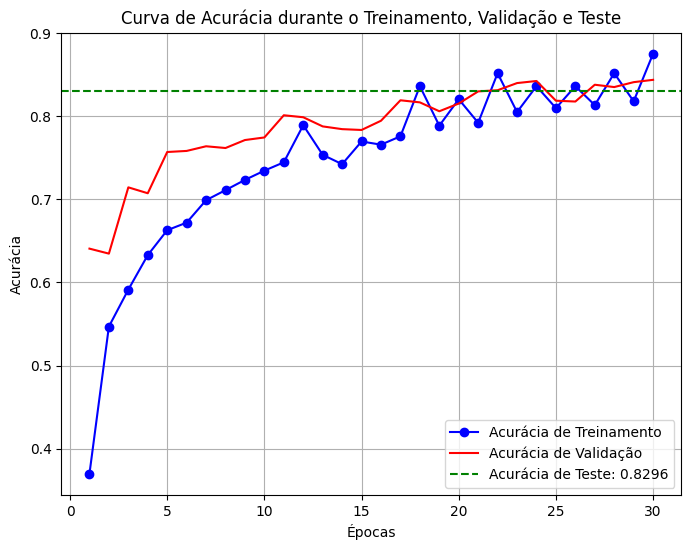

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'bo-', label='Acurácia de Treinamento')
plt.plot(epochs, val_acc, 'r-', label='Acurácia de Validação')

plt.axhline(y=test_acc, color='g', linestyle='--', label=f'Acurácia de Teste: {test_acc:.4f}')

plt.title('Curva de Acurácia durante o Treinamento, Validação e Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


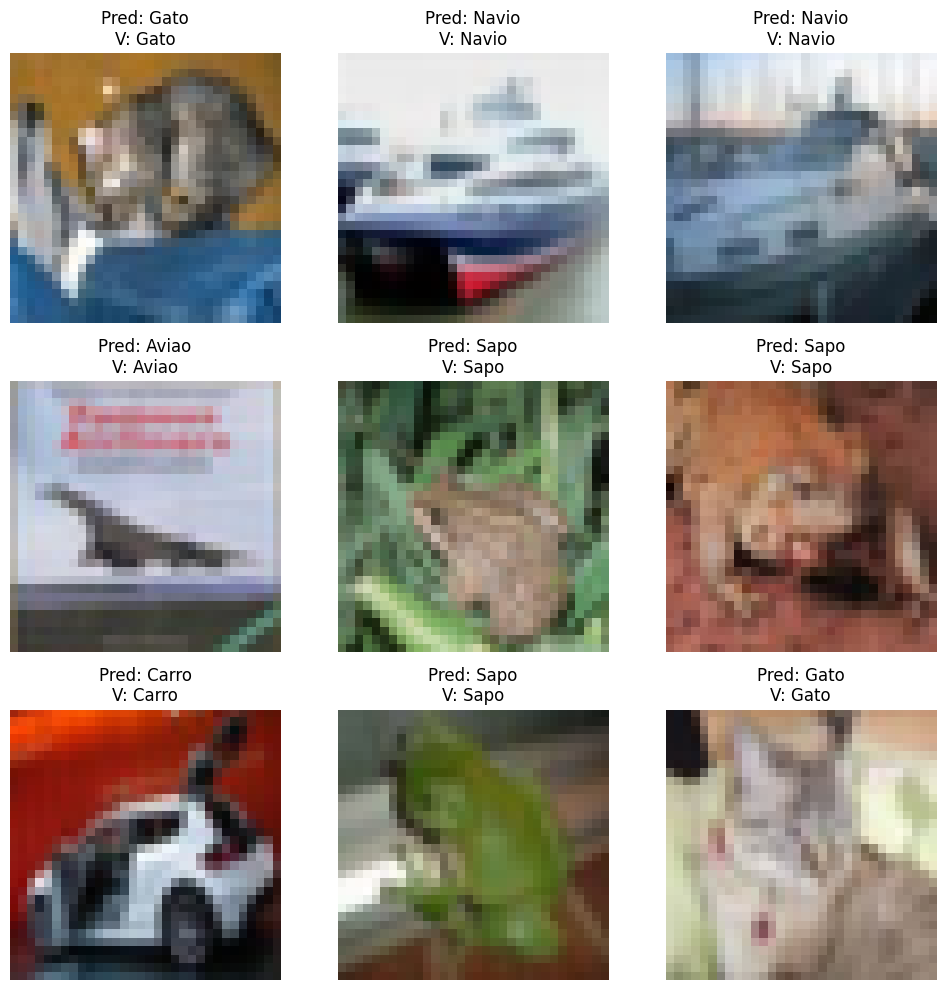

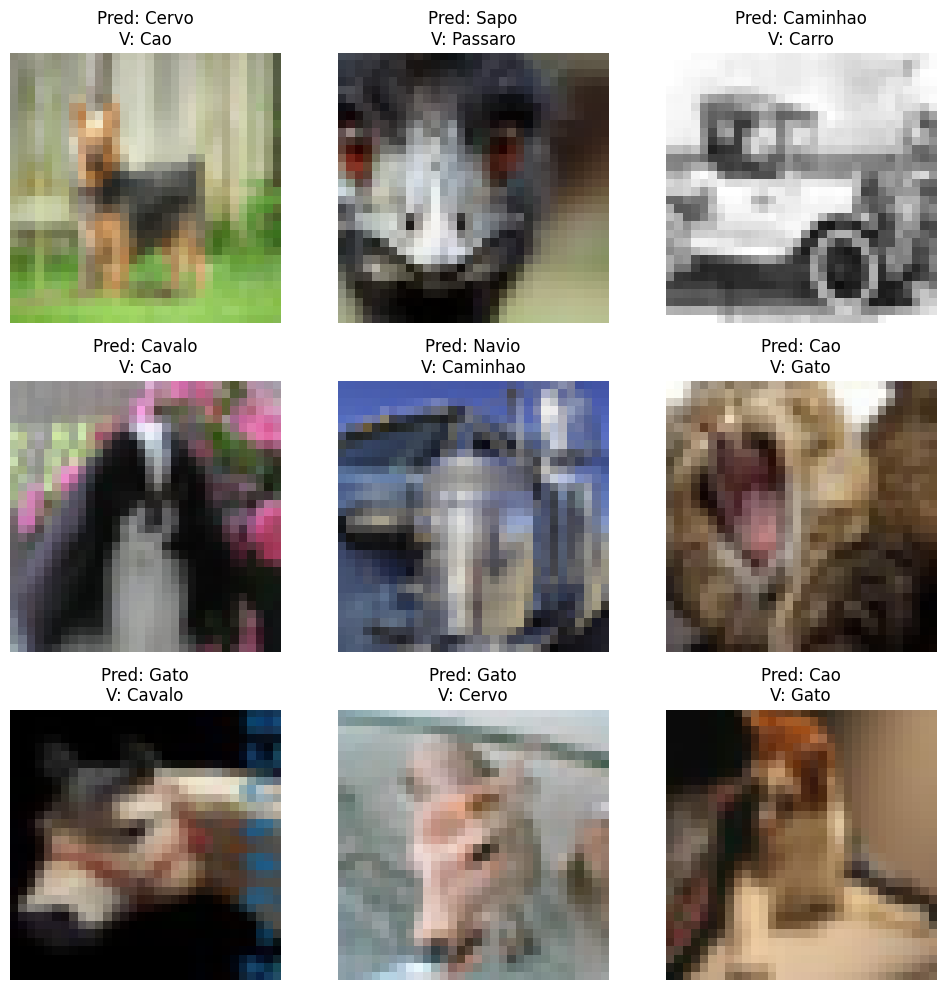

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_ohe, axis=1)

correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

class_names = ['Aviao', 'Carro', 'Passaro', 'Gato', 'Cervo', 'Cao', 'Sapo', 'Cavalo', 'Navio', 'Caminhao']

plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct])
    plt.title(f"Pred: {class_names[predicted_classes[correct]]}\nV: {class_names[true_classes[correct]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect])
    plt.title(f"Pred: {class_names[predicted_classes[incorrect]]}\nV: {class_names[true_classes[incorrect]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def evaluate(X_test, y_test, grid_search=None, model=None,):
    class_names = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cão', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Get the best parameters and best score
    if (grid_search!=None):
      best_params = grid_search.best_params_
      best_score = grid_search.best_score_

    # Print the evaluation results
    print(f"{'='*40}\nEvaluation Metrics\n{'='*40}")

    if (grid_search!=None):
      print(f"Best Parameters : {best_params}")
      print(f"Best Grid Search Score: {best_score:.4f}")

    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"{'='*40}\n")

    # Print detailed classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Create a confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=12)
    plt.ylabel('Actual', fontsize=10)
    plt.xlabel('Predicted', fontsize=10)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Evaluation Metrics
Accuracy  : 0.8362
Precision : 0.8435
Recall    : 0.8362
F1-Score  : 0.8340


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1000
           1       0.91      0.94      0.92      1000
           2       0.89      0.72      0.80      1000
           3       0.80      0.56      0.66      1000
           4       0.85      0.77      0.81      1000
           5       0.72      0.82      0.77      1000
           6       0.70      0.96      0.81      1000
           7       0.88      0.88      0.88      1000
           8       0.94      0.92      0.93      1000
           9       0.93      0.87      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



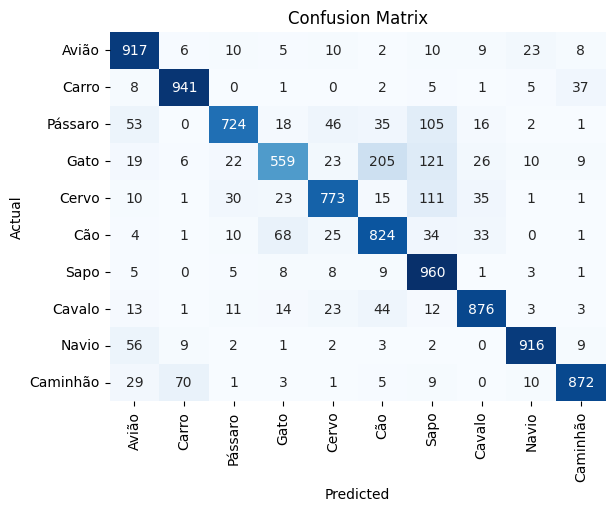

In [ ]:
evaluate(X_test, y_test, model=model)

In [ ]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

In [ ]:
def plot_results(metrics, ylabel, ylim, metric_name, color):
    epochs =[i for i in range(1,(len(metrics[0]) + 1))]
    plt.plot(epochs, metrics[0], color=color[0], label=metric_name[0])
    plt.plot(epochs, metrics[1], color=color[1], label=metric_name[1])

    plt.ylabel(ylabel)
    plt.xlabel("Epoch")
    plt.legend()
    plt.xticks(epochs)
    plt.grid(True)

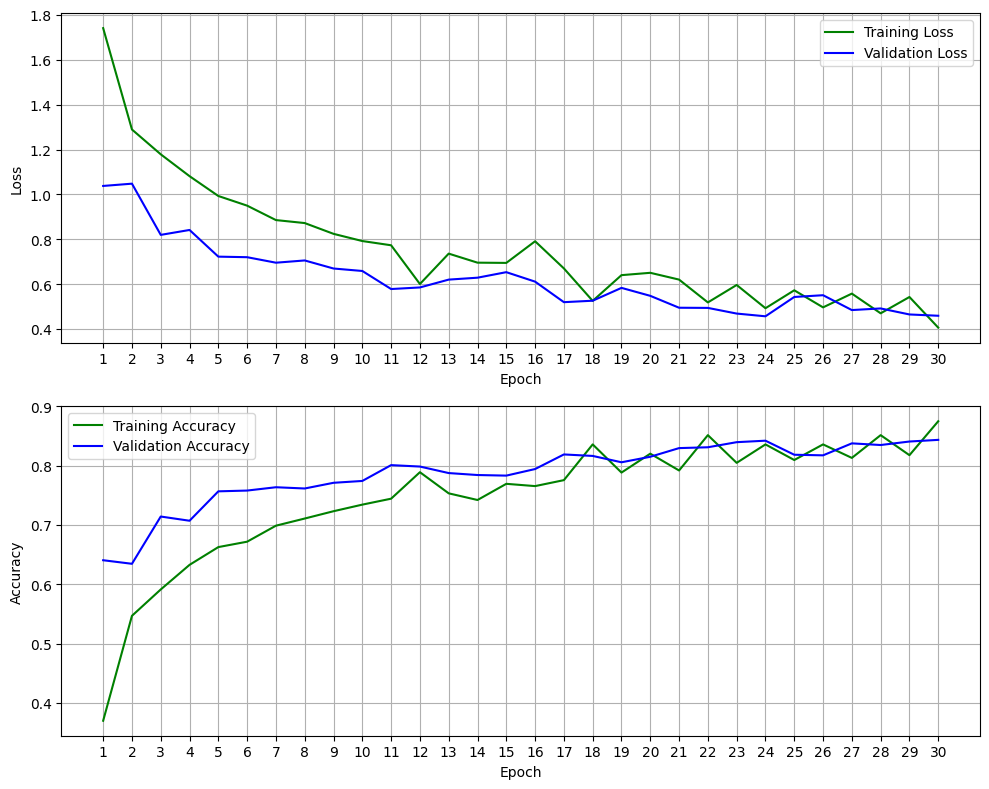

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plot_results([train_loss, valid_loss],
             ylabel="Loss",
             ylim=[0.0, 0.5],
             metric_name=["Training Loss", "Validation Loss"],
             color=["g", "b"])

plt.subplot(2, 1, 2)
plot_results([train_acc, valid_acc],
             ylabel="Accuracy",
             ylim=[0.9, 1.0],
             metric_name=["Training Accuracy", "Validation Accuracy"],
             color=["g", "b"])

plt.tight_layout()
plt.show()
